## Customer Churn Prediction
### Md Patwary
#### 09/05/2024

Predicting whether a customer is likely to churn or not. 
The dataset used for this prediciton can be found:
https://www.kaggle.com/datasets/barun2104/telecom-churn



Features:
Dependent Variable:
- Churn: 1 if customer cancelled service, 0 if not.

Independent Variables:
- AccountWeeks: number of weeks customer has had active account.
- ContractRenewal: 1 if customer recently renewed contract, 0 if not.
- DataPlan: 1 if customer has data plan, o if not.
- DataUsage: gigabytes of monthly data usage.
- CustServCalls: number of calls into customer service.
- DayMins: average daytime minutes per month.
- DayCalls: average number of daytime calls.
- MonthlyCharge: average monthly bill.
- OverageFee: largest overage free in the last 12 months. 
- RoamMins: average number of roaming minutes.

Our task is to find which of these variables have a strong correlation to customer churn, and then using those features we will create a predictive model that can predict whether a customer is likely to churn or not based on inputs provided by the user. 


In [31]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics  import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFE
import joblib

In [32]:
# loading data
file_path = "/Users/mdspatwary/Customer_Churn/telecom_churn.csv"
data = pd.read_csv(file_path)
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [33]:
data.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [34]:
data.head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [36]:
# missing variables (if any)
missing_values = data.isnull().sum()

# percentage of data missing (if any)
missing_percent = (missing_values/len(data))*100

print(missing_values)
print(missing_percent)


Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64
Churn              0.0
AccountWeeks       0.0
ContractRenewal    0.0
DataPlan           0.0
DataUsage          0.0
CustServCalls      0.0
DayMins            0.0
DayCalls           0.0
MonthlyCharge      0.0
OverageFee         0.0
RoamMins           0.0
dtype: float64


In [37]:
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


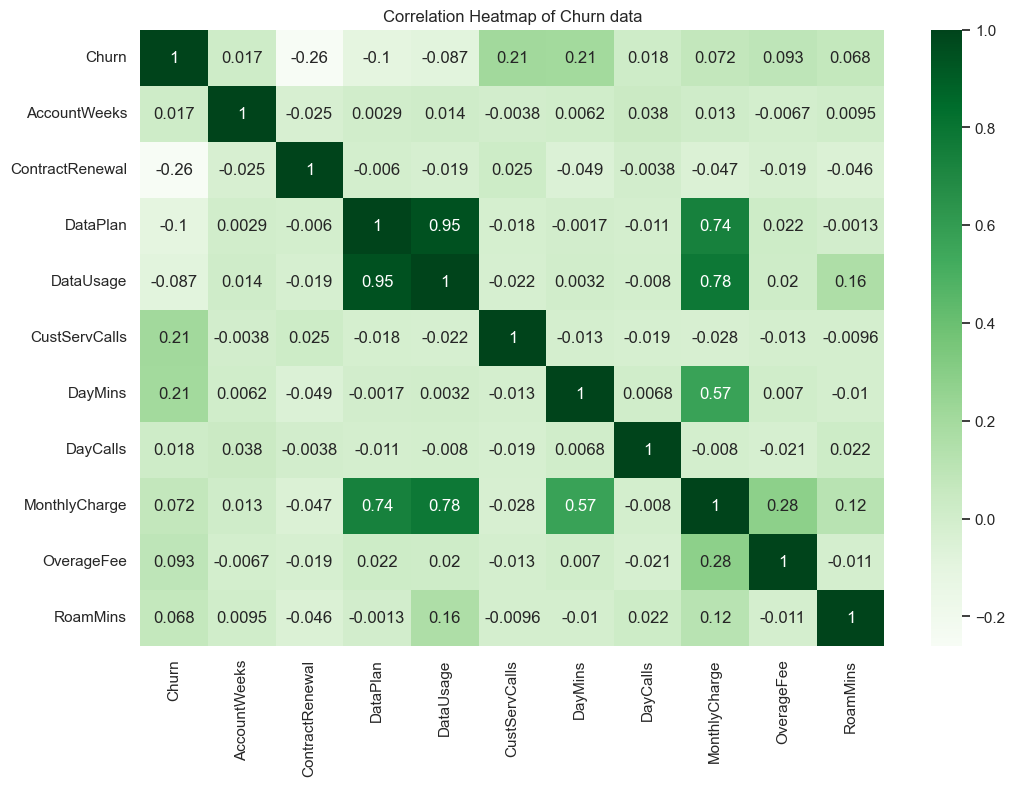

In [38]:
# visualize
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="Greens")
plt.title("Correlation Heatmap of Churn data")
plt.show()

### Addressing Multicolinearity 
From the heatmap we can se that DataUsage and DataPlan have a strong correlation coefficient, which introduces the possibility of multicolinearity in the data. And we don't want our model to overfit or have any redundancy. DataUsage also has a higher correlation with MonthlyCharge. Hence, we will exlcude DataUsage because DataPlan has stronger correlation with Churn and MonthlyCharge can provide us similar insights as DataUsage. 

### Features to keep
From the correlation heatmap we see there are a lot of features which might be important. So we will try to understand which features to keep through some trial and error. 

In [39]:
# defining feature and target variables
features = ['AccountWeeks', 'ContractRenewal', 'DataPlan','CustServCalls', 
            'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee','RoamMins']
target = ['Churn']
X = data[features]
Y = data[target]

In [40]:
# standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
# splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

#displaying shapes of resulting datasets
print(f'Training set shape: X={X_train.shape}, Y={Y_train.shape}')
print(f'Testing set shape: X={X_test.shape}, Y={Y_test.shape}')

Training set shape: X=(2333, 9), Y=(2333, 1)
Testing set shape: X=(1000, 9), Y=(1000, 1)


In [42]:
# Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, Y_train)
y_pred_log = logistic_model.predict(X_test)

print("Logistic Regression Model")
print("Accurary: ", accuracy_score(Y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_log))
print("Classification Report:\n", classification_report(Y_test, y_pred_log))


Logistic Regression Model
Accurary:  0.867
Confusion Matrix:
 [[838  19]
 [114  29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       857
           1       0.60      0.20      0.30       143

    accuracy                           0.87      1000
   macro avg       0.74      0.59      0.62      1000
weighted avg       0.84      0.87      0.84      1000



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
# Random Forest Classifier Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Model")
print("Accuracy: ", accuracy_score(Y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_rf))
print("Classfication Report:\n", classification_report(Y_test, y_pred_rf))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Model
Accuracy:  0.93
Confusion Matrix:
 [[844  13]
 [ 57  86]]
Classfication Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       857
           1       0.87      0.60      0.71       143

    accuracy                           0.93      1000
   macro avg       0.90      0.79      0.84      1000
weighted avg       0.93      0.93      0.92      1000



In [44]:
# Gradient Boosting Classifier Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, Y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Model")
print("Accuracy: ", accuracy_score(Y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_gb))
print("Classification Report:\n", classification_report(Y_test, y_pred_gb))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Model
Accuracy:  0.938
Confusion Matrix:
 [[844  13]
 [ 49  94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       857
           1       0.88      0.66      0.75       143

    accuracy                           0.94      1000
   macro avg       0.91      0.82      0.86      1000
weighted avg       0.94      0.94      0.93      1000



Out of the three different models picked, gradient boost classifier seems to be the top performer. So we will use that for our predicition. 

In [45]:
# saving models
joblib.dump(gb_model, 'gradient_boosting_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']